# Part II - (Presentation of Prosper Loan Data Exploration)
## by (SANDRA NWANKWO)

## Investigation Overview

> My main interest in this dataset investigation was to understand the different motivations of borrowers when applying for loans. I also want to know the conditions that favor loan eligibility. Not all the variables in this dataset were necessary for this investigation, hence my focus was on the key features relevant to this dataset exploration.


## Dataset Overview

> Loan Data from Prosper is a data set that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Prosper is a personal loan pioneer — the San Francisco, California based company specializes in loans at low interest rates to the borrowers. The company became the first firm to enter the peer-to-peer lending arena when it launched in 2005.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_clean = pd.read_csv("C:\\Users\\User\\Downloads\\project-template\\Project Template\\new_prosperLoanData.csv")

## (Visualization 1)
### EmploymentStatus vs Borrower APR

> I cannot see any linear relationship between borrowers APR and Employment Status. Employed people have lower inter-quartile range (IQR) than not employed. The not employed borrowers have the highest mean borrower APR

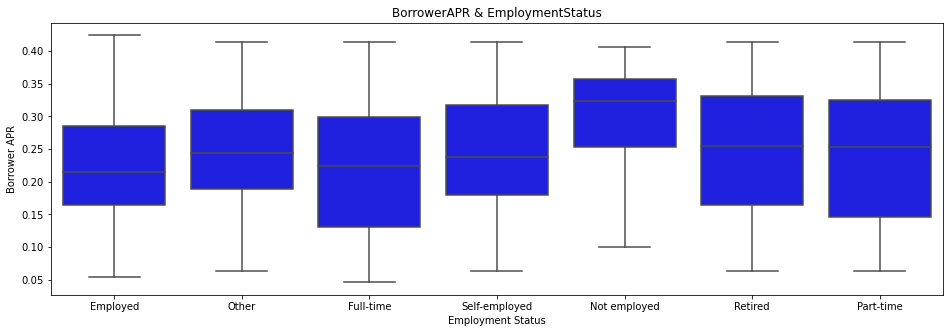

In [3]:
plt.figure(figsize = [16, 5])
sb.boxplot(data=loan_clean,y='BorrowerAPR',x='EmploymentStatus',color='blue');
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

## (Visualization 2)
### ListingCategory vs LoanOriginalAmount

> The largest loans were taken for Debt consolidation, and the least loan amount were for student use. I am a bit surprised that more people collected loans for boats than for home improvement. It is an unexpected but interesting insight.

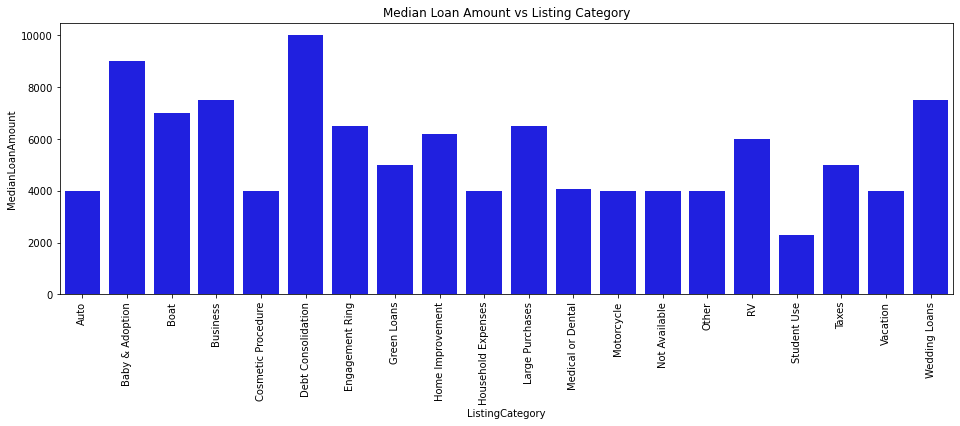

In [4]:
# obtain the median loan amount by listing category
table = loan_clean.groupby('ListingCategory')['LoanOriginalAmount'].median()
table = table.reset_index(name='MedianLoanAmount')

# Create barplot for further visualization
plt.figure(figsize = [16, 5])
sns.barplot(data=table, x='ListingCategory', y='MedianLoanAmount', ci=None, color='blue').set_title('Median Loan Amount vs Listing Category');
plt.xticks(rotation= 90);

## (Visualization 3)
### BorrowerAPR vs LoanOriginalAmount
> There appears to be a negative relationship between BorrowerAPR and Loan Original Amount. This suggest that as the loan amount increases, the Borrower’s Annual Percentage Rate for the loan decreases.

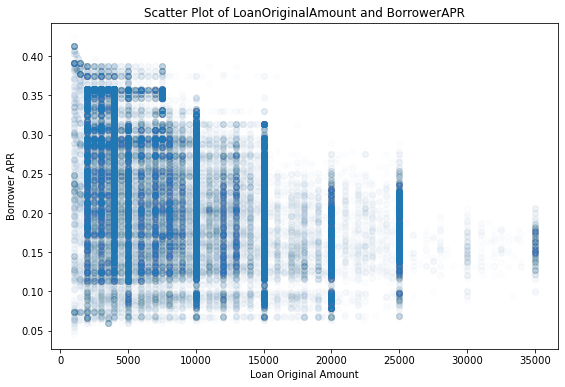

In [5]:
plt.figure(figsize = [20, 6]) 
plt.subplot(1, 2, 1)
plt.scatter(data = loan_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR');

## (Visualization 4)
### Loan status vs Employment status vs Borrowers APR?
>  Employed and Full-time have the lowest APR despite the category of loan status, while the non-employed have the highest APR.

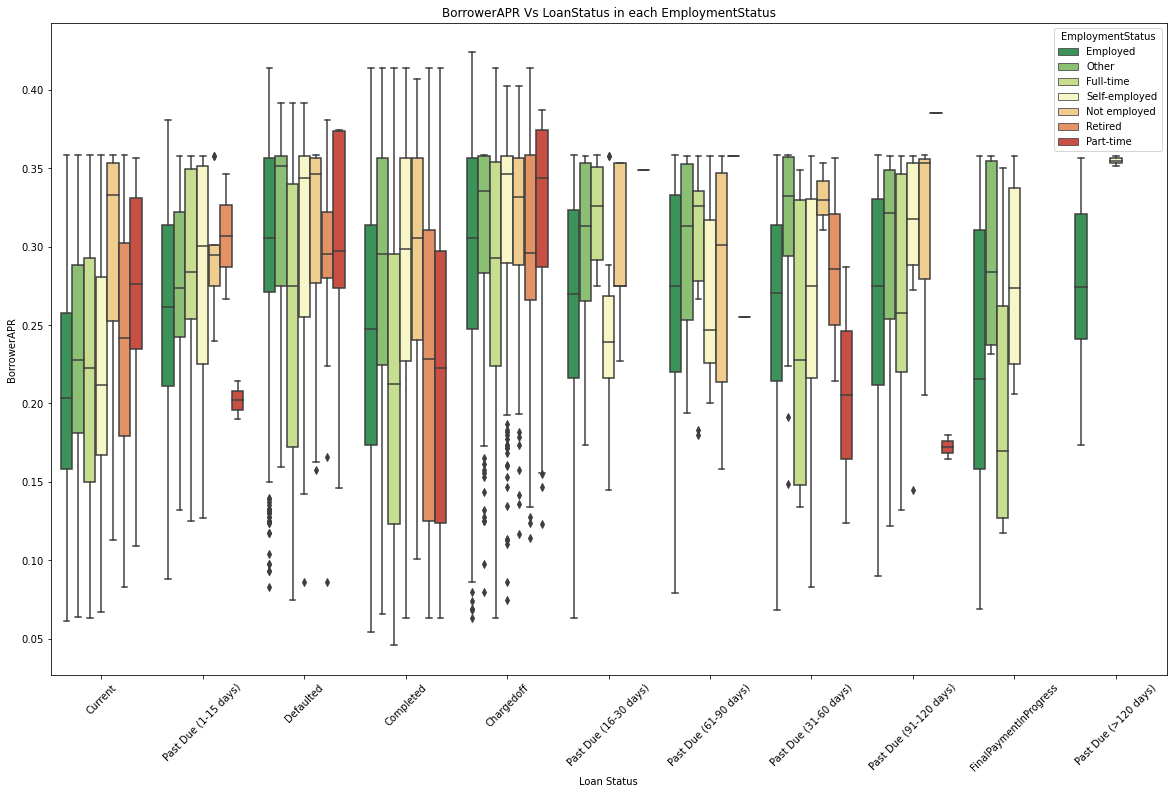

In [6]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=loan_clean, palette="RdYlGn_r");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 45);

## (Visualization 5)
### BorrowerAPR vs LoanOriginalAmount vs IncomeRange?
> Higher income earners can enjoy larger loans at a lower borrower APR

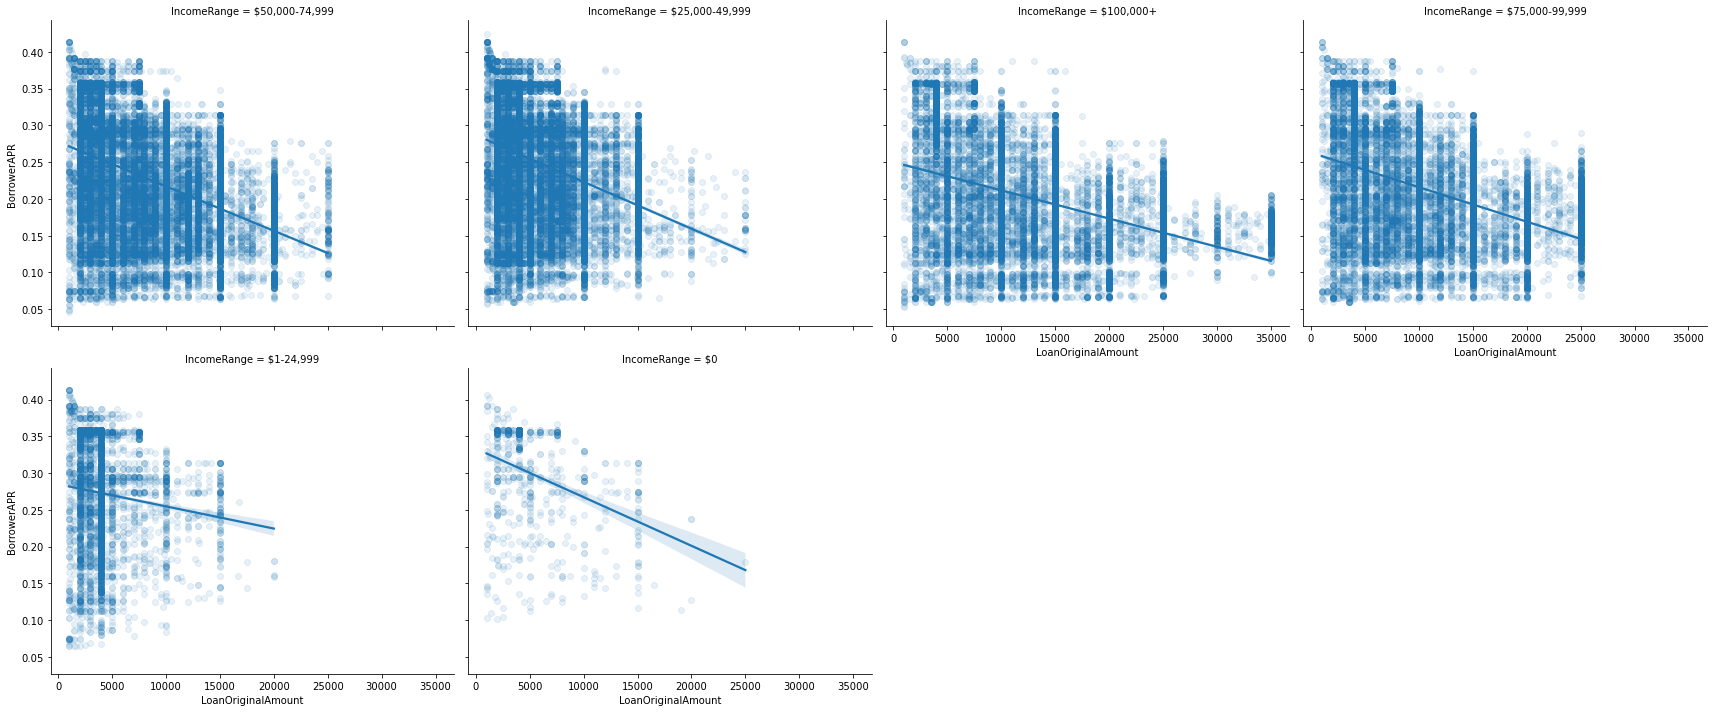

In [7]:
g=sb.FacetGrid(data=loan_clean, aspect=1.2, height=5, col='IncomeRange', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

In [8]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 583569 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_